In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 1s 0us/step


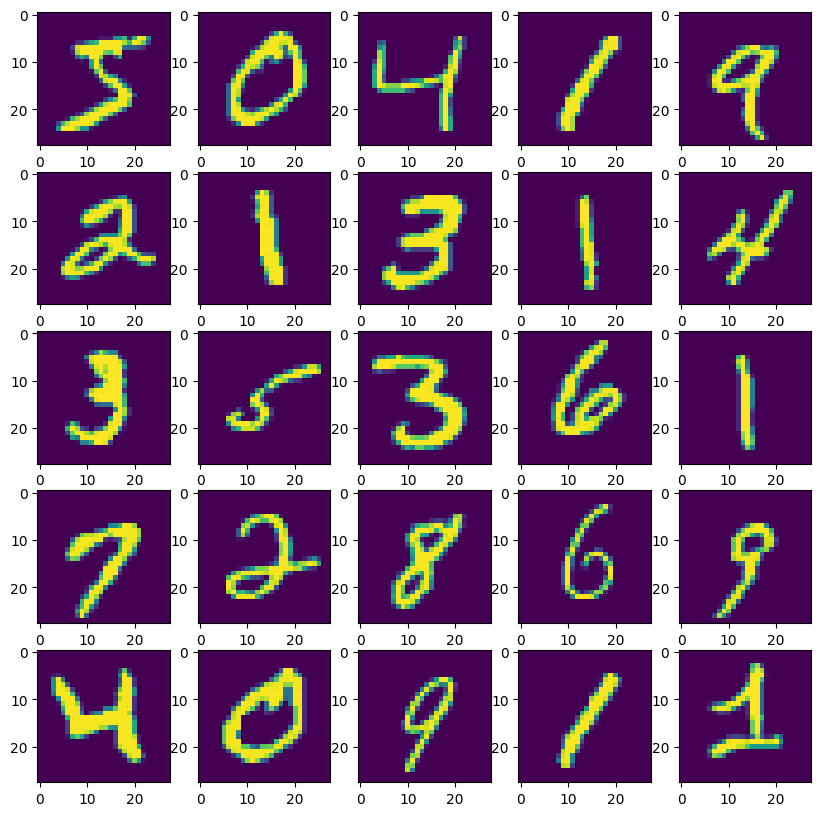

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.imshow(x_train[i],)
plt.show()

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [6]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

In [7]:
model.compile(optimizer = "adam", loss=loss_fn, metrics=["accuracy"])

In [8]:
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 1s 455us/step - loss: 0.2941 - accuracy: 0.9129
Epoch 2/5
1875/1875 [==============================] - 1s 452us/step - loss: 0.1427 - accuracy: 0.9572
Epoch 3/5
1875/1875 [==============================] - 1s 453us/step - loss: 0.1053 - accuracy: 0.9686
Epoch 4/5
1875/1875 [==============================] - 1s 455us/step - loss: 0.0859 - accuracy: 0.9734
Epoch 5/5
1875/1875 [==============================] - 1s 455us/step - loss: 0.0742 - accuracy: 0.9765


In [9]:
model.evaluate(x_test, y_test, verbose = 2)

313/313 - 0s - loss: 0.0769 - accuracy: 0.9767 - 142ms/epoch - 455us/step


[0.07687713950872421, 0.9767000079154968]

In [10]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])
probability_model(x_test[:5]).numpy()

array([[1.7106422e-07, 3.3525005e-10, 8.7595154e-06, 1.1363770e-04,
        8.8483054e-11, 5.5315311e-08, 1.6932949e-12, 9.9987268e-01,
        5.2206161e-07, 4.2723868e-06],
       [2.0955068e-07, 9.5259587e-05, 9.9988413e-01, 1.6751319e-05,
        4.8644096e-16, 2.5445081e-06, 5.1530634e-08, 9.1674888e-13,
        1.1139576e-06, 7.4824331e-12],
       [8.9757862e-07, 9.9922001e-01, 6.6487089e-05, 9.8368855e-06,
        1.9211460e-05, 1.6715196e-05, 7.6709748e-06, 3.9437969e-04,
        2.6418036e-04, 6.4167978e-07],
       [9.9875319e-01, 2.4595542e-08, 4.7458461e-04, 2.1172516e-06,
        4.6029317e-07, 3.5900153e-05, 6.9816661e-04, 2.7927541e-05,
        3.3903564e-07, 7.2939547e-06],
       [4.5745972e-07, 9.4742081e-10, 3.1825000e-06, 5.0530962e-09,
        9.9515861e-01, 8.1624577e-08, 1.5794008e-06, 6.4765831e-05,
        7.5341410e-07, 4.7704852e-03]], dtype=float32)

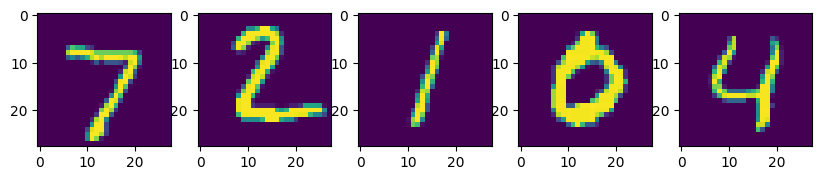

In [11]:
plt.figure(figsize = (10, 10))
for index, image in enumerate(x_test[:5]):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image)
plt.show()